In [97]:
%pylab inline
import numpy 
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from galpy import potential
from galpy.orbit import Orbit
from galpy.util import bovy_plot

Populating the interactive namespace from numpy and matplotlib
/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



# Problem 1
# a

Using $$v_c^2=\frac{GM(<r)}{r}$$ for spherical potentials and 

$$M(<r)=4\pi\rho_0a^3
\begin{cases}
    \frac{(r/a)^2}{2(1+r/a)^2} &\quad\text{Hernquist} \\
    ln(1+r/a)-\frac{(r/a)}{(1+r/a)} &\quad\text{NFW}
\end{cases}$$
allows us to write the cicular velocity as, 
$$V_c=\sqrt{4\pi G\rho_0 a^3}
\begin{cases}
    \frac{\sqrt{r}/a}{\sqrt{2}(1+r/a)} &\quad\text{Hernquist} \\
    \sqrt{\frac{ln(1+r/a)}{r}-\frac{(1/a)}{(1+r/a)}} &\quad\text{NFW}
\end{cases}$$
Now, to find $v_{max}$ we simply solve for $\frac{dv_c}{dr}=0$. This is equivalent to optimizing the two equations for $v_c^2$.

So the two equations we would like to optimize are,

$$f(r)=\frac{\sqrt{r}/a}{1+r/a}=\frac{r^{1/2}}{a+r}$$ for Hernquist potential 
and $$g(r)=\frac{ln(1+r/a)}{r}-\frac{1/a}{1+r/a}$$ for the NFW potential

Hernquist:
$$\frac{df(r)}{dr}=\frac{(a+r)1/2r^{-1/2}-r^{1/2}}{(a+r)^2}=0 \implies ar^{-1/2}-r^{1/2}=0 \implies r_{max}/a=1$$

substituting this back into equation for $v_c$ gives,
$$v_{max}=\frac{\sqrt{4\pi G \rho_0 a^2}}{2\sqrt{2}}$$

NFW:
Setting x=r/a, sustituting into g(r) and taking derivative gives,   
$$\frac{g(x)}{dx}=\frac{d}{dx}(\frac{ln(1+x)}{ax}-\frac{1/a}{1+x})=\frac{-ln(1+x)}{x^2}+\frac{1}{x(1+x)}+\frac{1}{(1+x)^2}=0$$

This must be solved numerically as done below.


In [98]:
x = numpy.linspace(0, 10, 301)
def h(x): return -(1/x**2)*(numpy.log(1+x))+1/(x*(1+x))+1/(1+x)**2
max_x = scipy.optimize.fsolve(lambda x: h(x), 1)
r_max=max_x
print (r_max)

[ 2.16258159]


Thus, $r_{max}/a$ of the NFW rotation curve is found to be $r_{max}/a\approx 2.163$. This is verified using an alternate numerical method below.

Optimization terminated successfully.
         Current function value: -0.216217
         Iterations: 17
         Function evaluations: 34
/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  

[ 2.16259766]


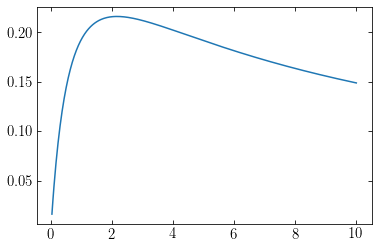

In [99]:
x = numpy.linspace(0, 10, 301)
def f(x): return (numpy.log(1+x))/x-(1/(1+x))
max_x = scipy.optimize.fmin(lambda x: -f(x), 1)
rmax_nfw = (max_x)
plt.plot(x,f(x))
print (max_x)



Now, substituting this value back into the expression for $v_c$ of the NFW rotation curve gives,
$$v_{max}\approx 0.465 \sqrt{4\pi G\rho_0 a^2}$$

In [55]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,
                     xtick_labelsize=15.,ytick_labelsize=15.)
hp_4scale= potential.HernquistPotential(amp=1.,a=1.)
hp= potential.HernquistPotential(amp=10./hp_4scale.mass(12.),a=1.)
nfp_4scale= potential.NFWPotential(amp=1.,a=1.)
nfp= potential.NFWPotential(amp=10./nfp_4scale.mass(12.),a=1.)

print (10./hp_4scale.mass(12.))
print (10./nfp_4scale.mass(12.))
rmax_hern=1.

23.47222222222222
6.09060715716


I can easily plot $r_{max}$ for both the Hernquist and NFW rotation curve but I don't know how how to find $\rho_0$ to solve for $v_{max}$. 

/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/galpy/potential_src/TwoPowerSphericalPotential.py:453: RuntimeWarning: invalid value encountered in double_scalars
  return -R/self.a/sqrtRz/(1.+sqrtRz/self.a)**2./2./self.a

/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/galpy/potential_src/TwoPowerSphericalPotential.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)

/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/galpy/potential_src/TwoPowerSphericalPotential.py:823: RuntimeWarning: invalid value encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)

0.912870929175
0.912870929175


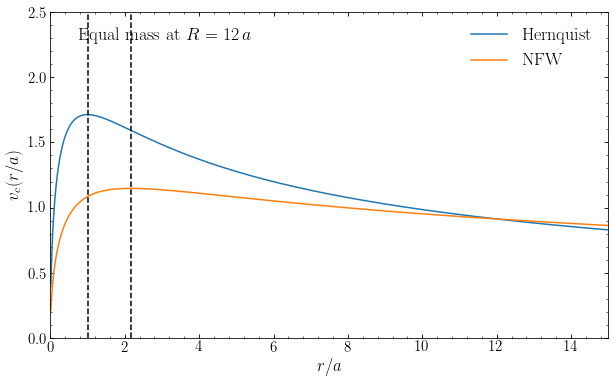

In [56]:
# Plot the rotation curve for each
figsize(10,6)
rmax_hern=1
line_hernquist= potential.plotRotcurve(hp,Rrange=[0.,15.],\
                label=r'$\mathrm{Hernquist}$',yrange=[0.,2.5],
                xlabel=r'$r/a$',ylabel=r'$v_c(r/a)$')
line_nfw= potential.plotRotcurve(nfp,Rrange=[0.,15.],\
                label=r'$\mathrm{NFW}$',overplot=True)
plt.axvline(rmax_hern,0,2,ls='--',color='k')
plt.axvline(rmax_nfw,0,2,ls='--',color='k')
plt.legend(handles=[line_hernquist[0],line_nfw[0]],
       fontsize=18.,loc='upper right',frameon=False)
bovy_plot.bovy_text(r'$\mathrm{Equal\ mass\ at}\ R=12\,a$',
                   top_left=True,size=18.)

print (hp.vcirc(12))
print (nfp.vcirc(12))




# b)

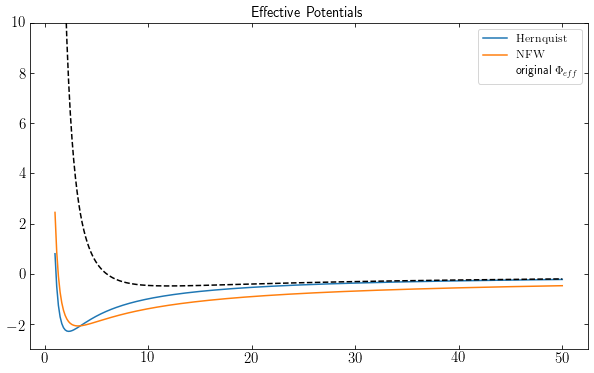

In [57]:
L1=(12*hp.vcirc(12))
L2=L1/3 #evaluate the new angular momentum
r=numpy.linspace(1,50,300)
hp_1d=potential.evaluatePotentials(hp,r,z=0)
nfp_1d=potential.evaluatePotentials(nfp,r,z=0)
hp_eff=(L1**2/(2*r**2))+hp_1d
nfp_eff=(L1**2/(2*r**2))+nfp_1d
hp_new_eff=(L2**2/(2*r**2))+hp_1d
nfp_new_eff=(L2**2/(2*r**2))+nfp_1d

figsize(10,6)
plt.plot(r,hp_new_eff,label=r'$\mathrm{Hernquist}$')
plt.plot(r,nfp_new_eff,label=r'$\mathrm{NFW}$')
plt.plot(r,hp_eff,'--',color='k')
plt.plot(r,nfp_eff,'-- ', color='k', label='original $\Phi_{eff}$')
plt.ylim([-3,10])
plt.legend()
plt.title('Effective Potentials')

From the above effective potentials we see that a bound orbit must be such that E<0, otherwise the orbit is unbound. Thus, point where the effective potential crosses 0 at small r corresponds to the smallest pericenter possible for that particular potential. Also, lowering the angular momentum by a factor of 3 moves the closest possible pericenter inward as seen by comparing the original $\Phi_{eff}$ to the adjusted ones with L/3. 

In [58]:
ind0=np.argwhere(hp_eff<0)[0]
ind1=np.argwhere(hp_new_eff<0)[0]
ind2=np.argwhere(nfp_new_eff<0)[0]
rad_orig=r[ind0]
rad_hern=r[ind1]
rad_nfw=r[ind2]

print (rad_orig)
print (rad_hern)
print (rad_nfw)

[ 6.08026756]
[ 1.1638796]
[ 1.3277592]


So, we see that decreasing L by a factor of 3 has moved the closest pericenter in by a factor of $\approx$ 6 for both types of potentials. 

# Problem 2
# a) & c)

In [59]:
%%latex
Starting from the isochrone protential provided in the notes (ch.3) we calculate the pericenter of the orbit,  

<IPython.core.display.Latex object>

In [60]:
Tr=10
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,
                     xtick_labelsize=15.,ytick_labelsize=15.)
ip= potential.IsochronePotential(normalize=1.,b=1.)
oi= Orbit([1.,0.25,1.4,0.])
ts= numpy.linspace(0.,4*Tr,1001)
oi.integrate(ts,ip)

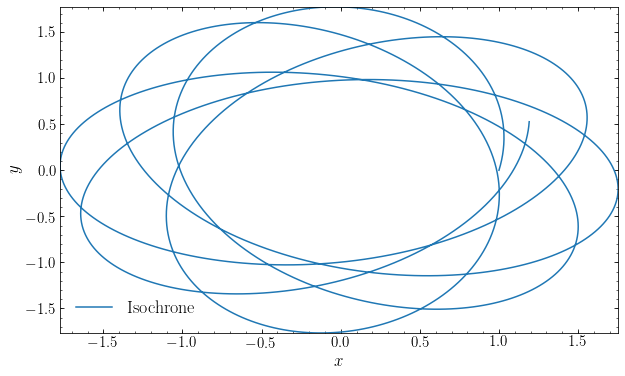

In [61]:
ip= potential.IsochronePotential(normalize=1.,b=1.)
oi= Orbit([1.,0.25,1.4,0.])
ts= numpy.linspace(0.,4*Tr,1001)
oi.integrate(ts,ip)


figsize(10,6)
oi.plot(label=r'$\mathrm{Isochrone}')
plt.legend(fontsize=18.,loc='lower left',frameon=False)


In [62]:
%%latex
plotting the radius of the orbit as a function of time shows the cycling of the orbit from pericenter to apocenter,

<IPython.core.display.Latex object>

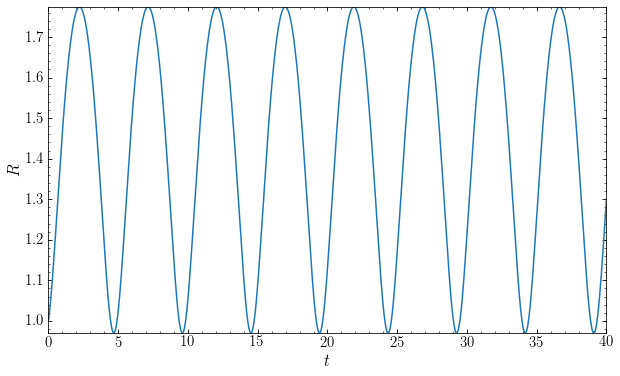

In [63]:
oi.plotR()

In [64]:
%%latex
we would like to find the precise time that the orbit reaches pericenter and add a velocity perturbation,

<IPython.core.display.Latex object>

In [65]:
iso_peri=oi.rperi()
iso_rad=oi.R(ts)
print ("orbit initially starts at radius of %.2f" %iso_rad[0])
print ("pericenter is %.3f radial scales from center" %iso_peri)
t_peri=ts[numpy.argmin(iso_rad)]
print ("and occurs at a time of %.3f" %t_peri)

orbit initially starts at radius of 1.00
pericenter is 0.970 radial scales from center
and occurs at a time of 9.600


In [66]:
%%latex
Looking at the plot above it's obvious that numerous pericenters exist in the range of times plotted. 
We would like to add instantaneous velocity to the orbit at one of these pericenters.  

<IPython.core.display.Latex object>

original orbit has:
pericenter=0.970
apocenter=1.774
eccentricity=0.293


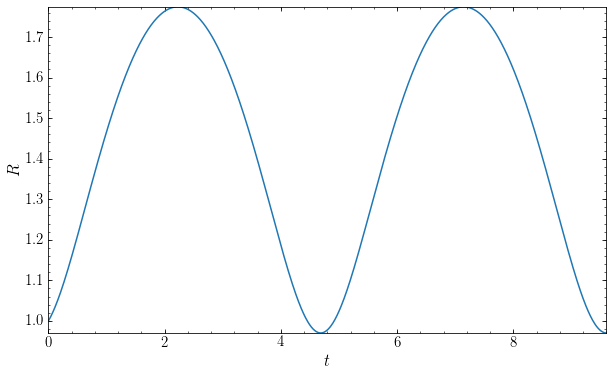

In [67]:
oi= Orbit([1.,0.25,1.4,0.])
ts= numpy.linspace(0.,t_peri,1001)
oi.integrate(ts,ip)
oi.plotR()
iso_peri=oi.rperi()
iso_apo=oi.rap()
iso_e=oi.e()
print ("original orbit has:")
print ("pericenter=%.3f" %iso_peri)
print ("apocenter=%.3f" %iso_apo)
print ("eccentricity=%.3f" %iso_e)

In [68]:
print ("Initial conditions at the pericenter are R=%.3f,vR=%.3f,vT=%.3f,phi=%.3f" %(oi.R(t_peri),oi.vR(t_peri),oi.vT(t_peri),oi.phi(t_peri)))


Initial conditions at the pericenter are R=0.970,vR=0.000,vT=1.443,phi=1.151


In [69]:
%%latex

Original pericenter radius is 0.970. 
Let's start by peturbing the velocity postively in the radial direction,

<IPython.core.display.Latex object>

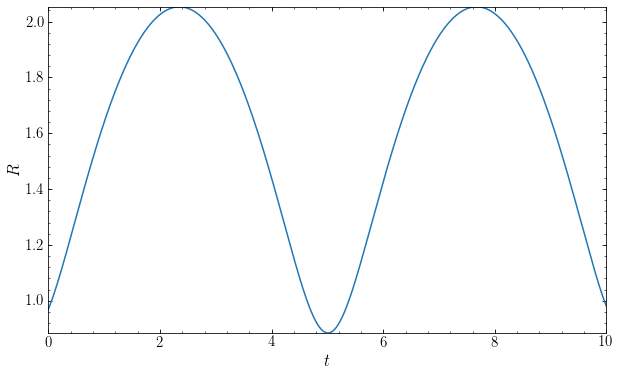

In [70]:
oi2=Orbit([oi.R(t_peri),oi.vR(t_peri)+0.5,oi.vT(t_peri),oi.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
oi2.plotR()

In [71]:
oi2.rperi()
oi2.rap()
oi2.e()
print ("After adding a positive radial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())


After adding a positive radial perturbation we have:
pericenter=0.885
apocenter=2.053
eccentricity=0.398


After adding a negative radial perturbation we have:
pericenter=0.885
apocenter=2.052
eccentricity=0.397


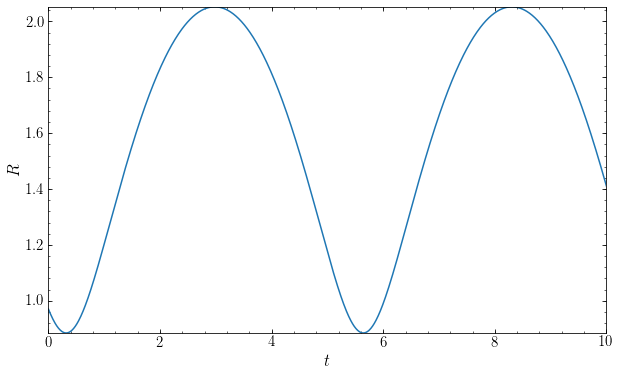

In [72]:
oi2=Orbit([oi.R(t_peri),oi.vR(t_peri)-0.5,oi.vT(t_peri),oi.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
oi2.plotR()

print ("After adding a negative radial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

In [73]:
%%latex
Let's perturb the orbit by adding a different radial perturbation

<IPython.core.display.Latex object>

After adding a negative radial perturbation we have:
pericenter=0.694
apocenter=3.543
eccentricity=0.672


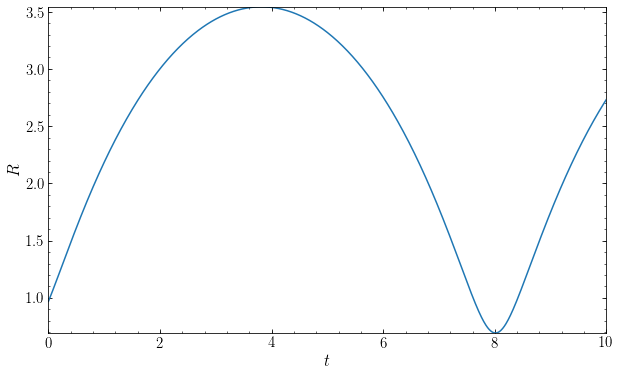

In [74]:
oi2=Orbit([oi.R(t_peri),oi.vR(t_peri)+1.2,oi.vT(t_peri),oi.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
oi2.plotR()
print ("After adding a negative radial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

In [75]:
%%latex
Thus, radial velocity perturbations to the orbit always acts to reduce the pericenter regardless of direction of perturbation.
The larger the perturbation the larger reduction in pericenter while the apocenter always increases for any perurbations. Obviously, this works 
together to increase the eccentricity of the orbit since the two extrema of the orbit are further apart. 

<IPython.core.display.Latex object>

In [76]:
%%latex
Now let's consider adding a tangential velocity perturbation,

<IPython.core.display.Latex object>

After adding a positive tangential perturbation we have:
pericenter=0.970
apocenter=3.772
eccentricity=0.591


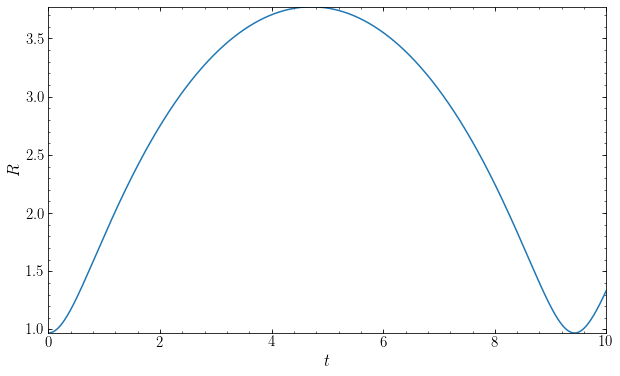

In [77]:
oi2=Orbit([oi.R(t_peri),oi.vR(t_peri),oi.vT(t_peri)+0.5,oi.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
oi2.plotR()
print ("After adding a positive tangential perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

In [78]:
%%latex
Conversely, let's remove subtract tangential velocity and see what happens,

<IPython.core.display.Latex object>

After adding a negative trangetial perturbation we have:
pericenter=0.914
apocenter=0.970
eccentricity=0.030


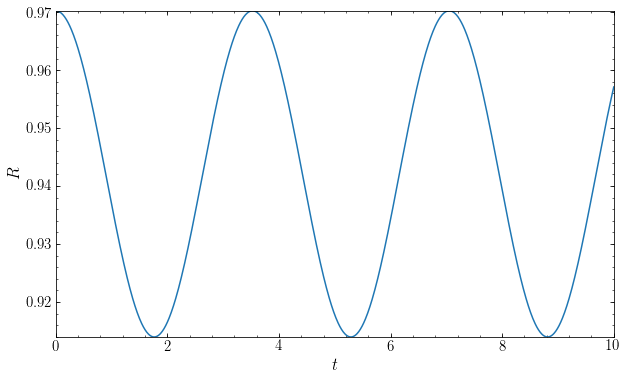

In [79]:
oi2=Orbit([oi.R(t_peri),oi.vR(t_peri),oi.vT(t_peri)-0.5,oi.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
oi2.plotR()
print ("After adding a negative trangetial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

In [80]:
%%latex
Thus, negative tangential velocity perturbations always acts to decrease the pericenter while the pericenter of the original orbit becomes the new apocenter.
Removing tangential velocity seems to bring the two extrema closer together thus decreasing the eccentricity. Positive perturbations on the other hand do not change the pericenter
but increase the apocenter thus increasing the eccentricity.    

<IPython.core.display.Latex object>

In [81]:
%%latex
Let's consider the effect of velocity perturbations at the pericenter on a different orbit. Let's look at an orbit in a Kepler potential
and follow the same process as above.

<IPython.core.display.Latex object>

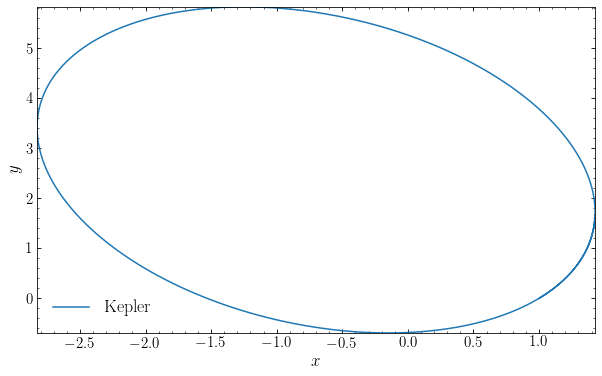

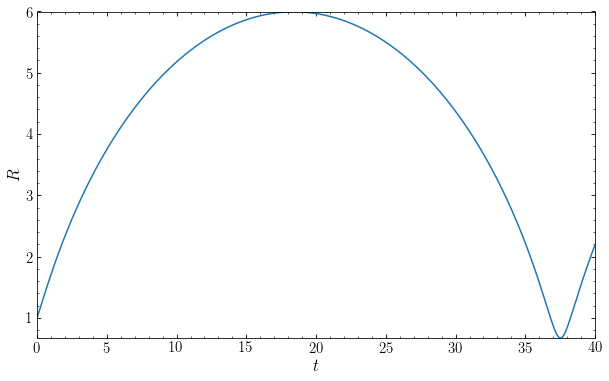

In [82]:
kp= potential.KeplerPotential(normalize=1.)
ok= Orbit([1.,0.7,1.1,0.])
ts= numpy.linspace(0.,4*Tr,1001)
ok.integrate(ts,kp)


ok.plot(label=r'$\mathrm{Kepler}')
plt.legend(fontsize=18.,loc='lower left',frameon=False)

ok.plotR()

In [83]:
kep_peri=ok.rperi()
kep_rad=ok.R(ts)
print ("orbit initially starts at radius of %.2f" %kep_rad[0])
print ("pericenter is %.3f radial scales from center" %kep_peri)
t_peri=ts[numpy.argmin(kep_rad)]
print ("and occurs at a time of %.3f" %t_peri)

orbit initially starts at radius of 1.00
pericenter is 0.673 radial scales from center
and occurs at a time of 37.520


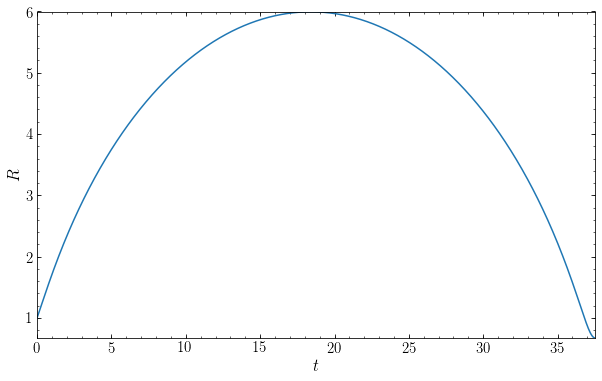

In [84]:
ts= numpy.linspace(0.,t_peri,1001)
ok.integrate(ts,kp)
ok.plotR()

In [85]:
print ("Initial conditions at the pericenter are R=%.3f,vR=%.3f,vT=%.3f,phi=%.3f" %(ok.R(t_peri),ok.vR(t_peri),ok.vT(t_peri),ok.phi(t_peri)))

Initial conditions at the pericenter are R=0.673,vR=-0.004,vT=1.635,phi=4.974


In [86]:
%%latex
The intial pericenter is at 0.673.
Again, let's start by perturbing the orbit in the radial direction

<IPython.core.display.Latex object>

'The new pericenter decreased to 0.663 after adding positive radial perturbation.'

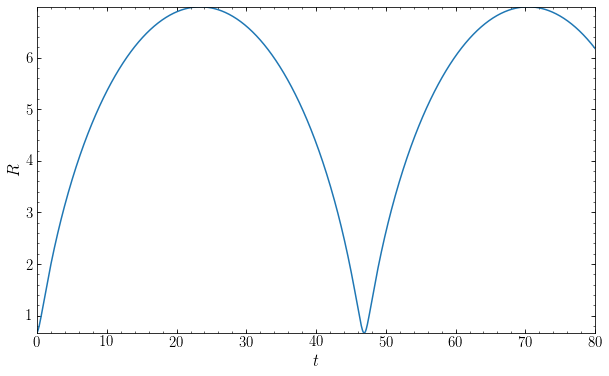

In [87]:
ok2=Orbit([ok.R(t_peri),ok.vR(t_peri)+0.2,ok.vT(t_peri),ok.phi(t_peri)])
ts= numpy.linspace(0.,Tr*8,1001)
ok2.integrate(ts,kp)
ok2.plotR()
kep2_peri=ok2.rperi()
"The new pericenter decreased to %.3f after adding positive radial perturbation." %kep2_peri

'The new pericenter has decreased to 0.662 after adding a negative radial perturbation.'

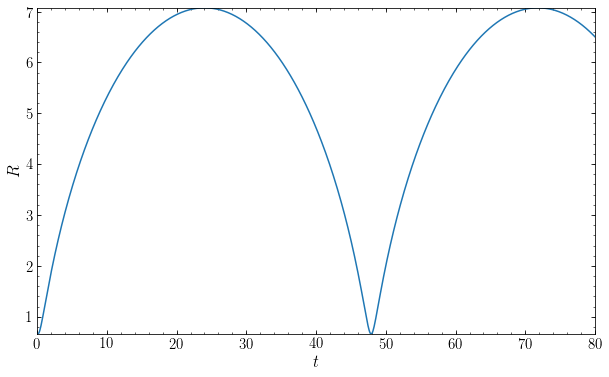

In [88]:
ok2=Orbit([ok.R(t_peri),ok.vR(t_peri)-0.2,ok.vT(t_peri),ok.phi(t_peri)])
ts= numpy.linspace(0.,Tr*8,1001)
ok2.integrate(ts,kp)
ok2.plotR()
kep2_peri=ok2.rperi()
"The new pericenter has decreased to %.3f after adding a negative radial perturbation." %kep2_peri

In [89]:
%%latex
Thus,like orbits in an isochrone potential radial velocity perturbations to the orbit always acts to reduce the pericenter regardless of direction of perturbation.
The larger the perturbation the larger reduction in pericenter. 

<IPython.core.display.Latex object>

In [90]:
%%latex
Looking at tangential perturbations,

<IPython.core.display.Latex object>

'The new pericenter decreased to 0.673 after adding positive radial perturbation.'

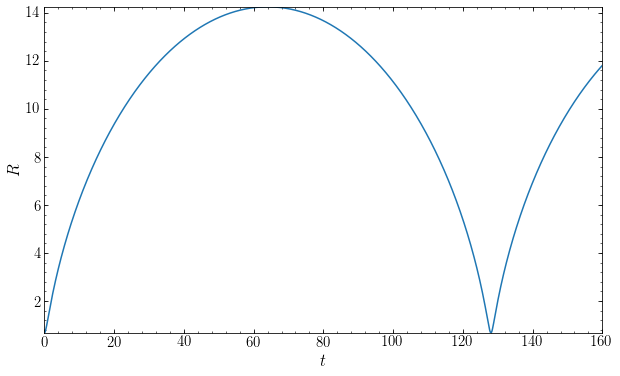

In [91]:
ok2=Orbit([ok.R(t_peri),ok.vR(t_peri),ok.vT(t_peri)+0.05,ok.phi(t_peri)])
ts= numpy.linspace(0.,Tr*16,1001)
ok2.integrate(ts,kp)
ok2.plotR()
kep2_peri=ok2.rperi()
"The new pericenter decreased to %.3f after adding positive radial perturbation." %kep2_peri

'The new pericenter decreased to 0.514 after adding positive radial perturbation.'

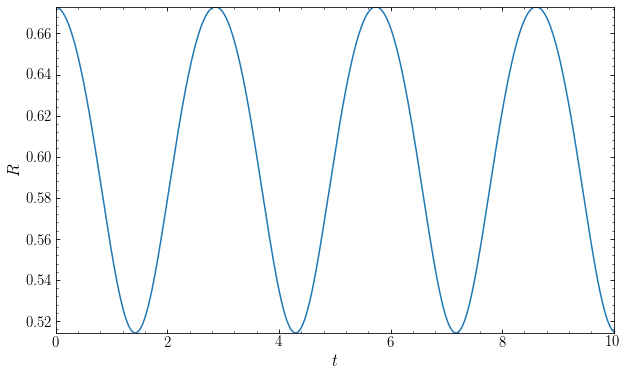

In [92]:
ok2=Orbit([ok.R(t_peri),ok.vR(t_peri),ok.vT(t_peri)-0.5,ok.phi(t_peri)])
ts= numpy.linspace(0.,Tr,1001)
ok2.integrate(ts,kp)
ok2.plotR()
kep2_peri=ok2.rperi()
"The new pericenter decreased to %.3f after adding positive radial perturbation." %kep2_peri

In [93]:
%%latex
Thus, like an isochrone potential a sufficient deacrease in tangential velocity will result in a smaller pericenter while any postive tangential perurbation
does not seem to affect the pericenter.

<IPython.core.display.Latex object>

# b)

Looking at different orbits in both Isochrone and Kepler potentials it seems that velocity perturbations at the 
pericenter tend to result in ensuing orbits that have a pericenter distance no larger than the initial. This property can be shown to be a general property of spherical potentials by looking at how these perurbations affect the expression for energy of the orbit.

Energy can be generally expressed as,
$$
\begin{equation}
E=\dot r^2/2+L^2/2r^2+\Phi(r)
\end{equation}
$$
At pericenter (& apocenter) $\dot r=0$ and so $E=\Phi(r)$.

Let's start by perturbing the orbit in the radial direction such that $\dot r=\delta$ ($\delta$ can be positive or negative). Since $E \propto \dot r^2 \propto \delta^2$ results in a net increase in energy. Since L=($r \times \dot r$) it is unchanged by any radial perurbations and E will always increase for any radial changes to it velocity at pericenter. Since $E_{pert} > E_{orig}$ the system will restablish a new equilibrium orbit with a smaller pericenter distance since a horizontal line representing $E_{pert}$ of the orbit will cross the the effective potential at a higher extent (see general shape of effective potenial in problem 1 b).  

If tangential velocity is changed then at that instant $\dot r$ in the radial direction remains 0 but $L \propto v_{tang}$ will now change. This of course also changes the orbital energy E by the same amount and so the equilibrium equation is still satisfied and so the new orbit will have this point as either the pericenter or apocenter.   




# d)

orbit initially starts at radius of 1.00
apocenter is 1.774 radial scales
and occurs at a time of 31.720


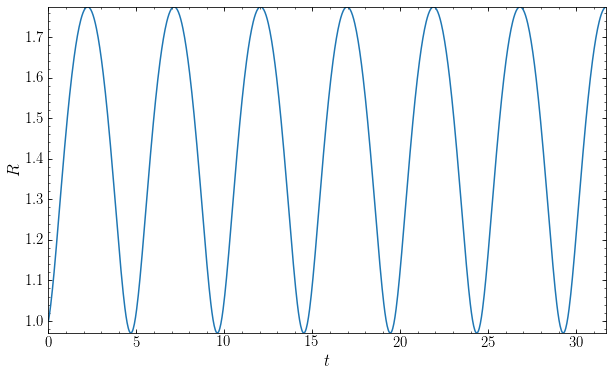

In [94]:
ip= potential.IsochronePotential(normalize=1.,b=1.)
oi= Orbit([1.,0.25,1.4,0.])
ts= numpy.linspace(0.,4*Tr,1001)
oi.integrate(ts,ip)

iso_apo=oi.rap()
iso_rad=oi.R(ts)
print ("orbit initially starts at radius of %.2f" %iso_rad[0])
print ("apocenter is %.3f radial scales" %iso_apo)
t_apo=ts[numpy.argmax(iso_rad)]
print ("and occurs at a time of %.3f" %t_apo)

oi= Orbit([1.,0.25,1.4,0.])
ts= numpy.linspace(0.,t_apo,1001)
oi.integrate(ts,ip)
oi.plotR()

Let's perturb the orbit at the apocenter by adding a positive radial perturbation.

In [95]:
print ("Recall original orbit has:")
print ("pericenter=%.3f" %iso_peri)
print ("apocenter=%.3f" %iso_apo)
print ("eccentricity=%.3f" %iso_e)


oi2=Orbit([oi.R(t_apo),oi.vR(t_apo)+0.5,oi.vT(t_apo),oi.phi(t_apo)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
#oi2.plotR()
print ("After adding a positive radial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

oi2=Orbit([oi.R(t_apo),oi.vR(t_apo)-0.5,oi.vT(t_apo),oi.phi(t_apo)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
#oi2.plotR()
print ("After adding a negative radial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

oi2=Orbit([oi.R(t_apo),oi.vR(t_apo),oi.vT(t_apo)+0.5,oi.phi(t_apo)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
#oi2.plotR()
print ("After adding a positive trangetial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

oi2=Orbit([oi.R(t_apo),oi.vR(t_apo),oi.vT(t_apo)-0.5,oi.phi(t_apo)])
ts= numpy.linspace(0.,Tr,1001)
oi2.integrate(ts,ip)
#oi2.plotR()
print ("After adding a negative trangetial perturbation we have:")
print ("pericenter=%.3f" %oi2.rperi())
print ("apocenter=%.3f" %oi2.rap())
print ("eccentricity=%.3f" %oi2.e())

Recall original orbit has:
pericenter=0.970
apocenter=1.774
eccentricity=0.293
After adding a positive radial perturbation we have:
pericenter=0.885
apocenter=2.053
eccentricity=0.398
After adding a negative radial perturbation we have:
pericenter=0.885
apocenter=2.052
eccentricity=0.397
After adding a positive trangetial perturbation we have:
pericenter=1.774
apocenter=2.115
eccentricity=0.088
After adding a negative trangetial perturbation we have:
pericenter=0.312
apocenter=1.774
eccentricity=0.701


Thus, radial perurbations behave the same way at apocenter as they do at pericenter while tangetntial perturbations behave in the exact opposite way. Specifically, positive tangential perturbations make the apocenter the pericenter of the new orbit thus decreasing the eccentricity by bringing the extrema of the orbits closer together. While negative tangential perturbations do not change the apocenter but decrease the pericenter causing the eccentricity to increase.  

# Problem 3
# a)

Recall the virial estimator $$\sum^N_{i=1}w_i \mathbf{v}_i \cdot \mathbf{v}_i=-\sum^N_{i=1}w_i \mathbf{x}_i \cdot \mathbf{F}(\mathbf{x}_i)$$ 
Now, substituting $\alpha=1$ into expression for a power law potential (Equation 3.37 of notes) gives 
$$\Phi(r)=\frac{-4\pi G \rho_0 r_0 r}{2}$$
Taking $\nabla \Phi=\bf{F}$ and substituting into virial estimator equation (take $w_i=1$ for all i) gives,
$$\sum^N_{i=1}|\mathbf{v_i}|^2=\sum^N_{i=1}2\pi G\rho_0 r_0 r_i$$
and using Equation 3.36 from notes we have an expression for M(<r),
$$M(<r_c)=2\pi \rho_0r_0 r_c^2$$
Subbing this into the virial estimator equation gives us a mass estimate,
$$M(<r_c)=\frac{r_c^2}{G}\frac{\sum^N_{i=1}|\mathbf{v_i}|^2}{\sum^N_{i=1} r_i}$$


# b)

In [104]:
from galdyncourse_util.load import harris
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as apycoords
gcdata= harris.read()
c= apycoords.SkyCoord(ra=gcdata['RA'],
                      dec=gcdata['DEC'],
                      distance=gcdata['R_Sun'],
                      unit=(u.deg,u.deg,u.kpc),
                      frame='icrs')
gc_frame= apycoords.Galactocentric(galcen_distance=8.1*u.kpc,
                                   z_sun=25.*u.pc)
gc = c.transform_to(gc_frame)
gc.representation = 'spherical'

rc=40.*u.kpc
indx= (gc.distance > 20.*u.kpc)
M_est= (3.*numpy.sum(gcdata['v_LSR'][indx]**2.)*(u.km/u.s)**2/numpy.sum(gc.distance[indx]))*(rc**2/const.G)
print ("""For a point-mass central potential,
    with %i GCs with median distance %.0f kpc
    the mass is %.2f 10^12 Msun""" % \
    (numpy.sum(indx),
     numpy.median(gc.distance[indx]).to(u.kpc).value,
     M_est.to(10**12*u.Msun).value))

For a point-mass central potential,
    with 22 GCs with median distance 37 kpc
    the mass is 0.34 10^12 Msun


# c)

Following the same procedure as in part a) but using the potential $\Phi(r)=v_c^2ln(r)$, we have, $\mathbf{F}(r)=\nabla \Phi(r)=v_c^2/r$

$$\sum^N_{i=1}|\mathbf{v_i}|^2=\sum^N_{i=1}v_c^2=\sum^N_{i=1}4\pi\rho_0 G r_0^2$$

and again Equation 3.36 from the notes gives us,

$$M(<r_c)=4\pi \rho_0r_0^2 r_c$$

substituting this into the virial estimator equation gives us,

$$M(<r_c)=\frac{r_c}{G}\sum^N_{i=1}|\mathbf{v_i}|^2$$

# d)

In [107]:
rc=40.*u.kpc
indx= (gc.distance > 20.*u.kpc)
M_est= (3.*numpy.sum(gcdata['v_LSR'][indx]**2.)*(u.km/u.s)**2)*(rc/const.G)
print ("""For a point-mass central potential,
    with %i GCs with median distance %.0f kpc
    the mass is %.2f 10^12 Msun""" % \
    (numpy.sum(indx),
     numpy.median(gc.distance[indx]).to(u.kpc).value,
     M_est.to(10**12*u.Msun).value))

For a point-mass central potential,
    with 22 GCs with median distance 37 kpc
    the mass is 9.40 10^12 Msun
